# Doublechecking net values

Some people have been reporting problems in the value of `net_value` column in the CEAP datasets. It doesn't seem to really match what it should contain.

In [1]:
import pandas as pd
import numpy as np

filenames = ['../data/2016-08-08-current-year.xz',
             '../data/2016-08-08-last-year.xz',
             '../data/2016-08-08-previous-years.xz']
dataset = pd.DataFrame()

for filename in filenames:
    data = pd.read_csv(filename,
                       parse_dates=[16],
                       dtype={'document_id': np.str,
                              'congressperson_id': np.str,
                              'congressperson_document': np.str,
                              'term_id': np.str,
                              'cnpj_cpf': np.str,
                              'reimbursement_number': np.str})
    dataset = pd.concat([dataset, data])

In [2]:
dataset['issue_date'] = pd.to_datetime(dataset['issue_date'], errors='coerce')

In [3]:
(dataset['document_value'].isnull()).sum()

17

In [4]:
dataset[dataset['document_value'].isnull()]

document_id       congressperson_name congressperson_id  \
72863       5021378              ALMEIDA LIMA            160626   
72864       5021389              ALMEIDA LIMA            160626   
243933      5028079          CARLOS ZARATTINI            141398   
286036      5028084            DANIEL ALMEIDA             74060   
422966      5062354          ELCIONE BARBALHO             74075   
513864      5073020        FRANCISCO ESCÓRCIO            137983   
652869      5063133        JANETE ROCHA PIETÁ            141455   
670406      5020275           JESUS RODRIGUES            160671   
1031812     5069601  MISSIONÁRIO JOSÉ OLIMPIO            160561   
1095064     5009532            ONYX LORENZONI             74399   
1118504     5030571                PADRE JOÃO            160556   
1180554     5016649               PEDRO HENRY             74111   
1212495     5020247   RAIMUNDO GOMES DE MATOS             74216   
1213738     5020251   RAIMUNDO GOMES DE MATOS             74216   
1214309     5020523   RAIMUNDO GOMES DE MATOS             74216   
1214331     5020531   RAIMUNDO GOMES DE MATOS             74216   
1214332     5020430   RAIMUNDO GOMES DE MATOS             74216   

        congressperson_document    term state  party term_id  subquota_number  \
72863                       173  2011.0    SE   PMDB      54                5   
72864                       173  2011.0    SE   PMDB      54                5   
243933                      398  2015.0    SP     PT      55               10   
286036                      188  2015.0    BA  PCdoB      55                3   
422966                       21  2015.0    PA   PMDB      55               13   
513864                      567  2011.0    MA   PMDB      54                3   
652869                      358  2011.0    SP     PT      54               15   
670406                      115  2011.0    PI     PT      54                4   
1031812                     375  2015.0    SP    DEM      55                3   
1095064                     510  2015.0    RS    DEM      55                3   
1118504                     259  2015.0    MG     PT      55                3   
1180554                     403  2011.0    MT     PP      54                9   
1212495                     102  2015.0    CE   PSDB      55                1   
1213738                     102  2015.0    CE   PSDB      55                8   
1214309                     102  2015.0    CE   PSDB      55               10   
1214331                     102  2015.0    CE   PSDB      55               10   
1214332                     102  2015.0    CE   PSDB      55               10   

                                     subquota_description      ...       \
72863                 Publicity of parliamentary activity      ...        
72864                 Publicity of parliamentary activity      ...        
243933                                  Telecommunication      ...        
286036                               Fuels and lubricants      ...        
422966                                Congressperson meal      ...        
513864                               Fuels and lubricants      ...        
652869            Aircraft renting or charter of aircraft      ...        
670406           Consultancy, research and technical work      ...        
1031812                              Fuels and lubricants      ...        
1095064                              Fuels and lubricants      ...        
1118504                              Fuels and lubricants      ...        
1180554                                    Flight tickets      ...        
1212495    Participation in course, talk or similar event      ...        
1213738  Security service provided by specialized company      ...        
1214309                                 Telecommunication      ...        
1214331                                 Telecommunication      ...        
1214332                                 Telecommunication      ... 

In [5]:
dataset[dataset['document_value'].isnull()].iloc[0]

document_id                                               5021378
congressperson_name                                  ALMEIDA LIMA
congressperson_id                                          160626
congressperson_document                                       173
term                                                         2011
state                                                          SE
party                                                        PMDB
term_id                                                        54
subquota_number                                                 5
subquota_description          Publicity of parliamentary activity
subquota_group_id                                               0
subquota_group_description                                    NaN
supplier                                        JULIANO AMADEU ME
cnpj_cpf                                           11901432000190
document_number                                          00000007
document_t

In [6]:
import math

dataset = dataset.dropna(subset=['document_value'])
dataset['document_value_int'] = (dataset['document_value'] * 100.).apply(math.ceil).astype(np.int)
dataset['remark_value_int'] = (dataset['remark_value'] * 100.).apply(math.ceil).astype(np.int)
dataset['net_value_int'] = (dataset['net_value'] * 100.).apply(math.ceil).astype(np.int)
dataset['calc_net_value_int'] = dataset['document_value_int'] - dataset['remark_value_int']

In [7]:
((dataset['calc_net_value_int'] - dataset['net_value_int']) != 0).sum()

21434

In [8]:
dataset.iloc[0]

document_id                                                             5928744
congressperson_name                                           ABEL MESQUITA JR.
congressperson_id                                                        178957
congressperson_document                                                       1
term                                                                       2015
state                                                                        RR
party                                                                       DEM
term_id                                                                      55
subquota_number                                                               1
subquota_description          Maintenance of office supporting parliamentary...
subquota_group_id                                                             0
subquota_group_description                                                  NaN
supplier                                

In [9]:
dataset['diff_net_value'] = dataset['calc_net_value_int'] - dataset['net_value_int']
dataset.loc[dataset['diff_net_value'] != 0, 'diff_net_value'].describe()

count    2.143400e+04
mean     6.495887e+04
std      3.402186e+05
min     -1.763608e+06
25%     -1.000000e+00
50%     -1.000000e+00
75%      1.086200e+04
max      9.712858e+06
Name: diff_net_value, dtype: float64

In [10]:
with_significant_difference = dataset.loc[dataset['diff_net_value'].abs() > 2]

In [11]:
with_significant_difference['subquota_description'].describe()

count                    9457
unique                     17
top       Flight ticket issue
freq                     4319
Name: subquota_description, dtype: object

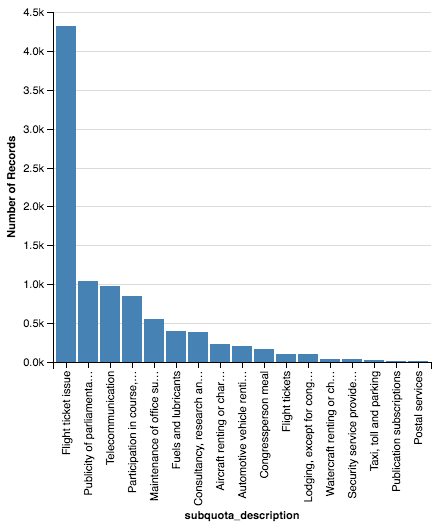

In [12]:
from altair import *

Chart(with_significant_difference).mark_bar().encode(
    x=X('subquota_description:O',
        sort=SortField(field='subquota_description',
                       order='descending',
                       op='count')),
    y='count(*):Q',
)

In [13]:
with_significant_difference.iloc[0]

document_id                                                            5914504
congressperson_name                                          ABEL MESQUITA JR.
congressperson_id                                                       178957
congressperson_document                                                      1
term                                                                      2015
state                                                                       RR
party                                                                      DEM
term_id                                                                     55
subquota_number                                                              8
subquota_description          Security service provided by specialized company
subquota_group_id                                                            0
subquota_group_description                                                 NaN
supplier                                            